# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
import pandas_datareader.data as web

Primero importaremos datos desde un archivo con extensión `.csv`

In [2]:
import pandas as pd

data = pd.read_csv("Excels\FB.csv")
print(data)

print(data.mean())
print(data.std())
print(data.describe())

FileNotFoundError: [Errno 2] No such file or directory: 'Excels\\FB.csv'

Ahora lo haremos desde Yahoo Finance

In [3]:
web.DataReader?

In [3]:
data = web.DataReader("AAPL", "yahoo", "2003-11-22", "2004-10-10")
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-11-24,0.379821,0.365179,0.366071,0.377679,381824800,0.322474
2003-11-25,0.379464,0.368036,0.379107,0.369286,268654400,0.315308
2003-11-26,0.377679,0.361607,0.373036,0.370000,245128800,0.315918
2003-11-28,0.376250,0.366429,0.371071,0.373393,76098400,0.318815
2003-12-01,0.390179,0.375000,0.375714,0.387679,361536000,0.331013
...,...,...,...,...,...,...
2004-10-04,0.699643,0.691964,0.699643,0.692679,574084000,0.591431
2004-10-05,0.708393,0.685714,0.688571,0.703036,406162400,0.600274
2004-10-06,0.727857,0.704821,0.705357,0.725714,446303200,0.619638


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [4]:
data["Open"]

Date
2003-11-24    0.366071
2003-11-25    0.379107
2003-11-26    0.373036
2003-11-28    0.371071
2003-12-01    0.375714
                ...   
2004-10-04    0.699643
2004-10-05    0.688571
2004-10-06    0.705357
2004-10-07    0.723929
2004-10-08    0.706429
Name: Open, Length: 220, dtype: float64

In [5]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000
mean,0.508011,0.492483,0.498999,0.500798,3.701000e+08,0.427597
std,0.093581,0.091125,0.091866,0.092758,2.185498e+08,0.079200
min,0.355179,0.343750,0.350893,0.351786,7.609840e+07,0.300366
25%,0.421473,0.407143,0.412098,0.411830,2.488388e+08,0.351634
50%,0.499732,0.483928,0.491071,0.491339,3.235876e+08,0.419521
75%,0.573928,0.556295,0.561875,0.565982,4.124792e+08,0.483254
max,0.730893,0.704821,0.723929,0.725714,1.767724e+09,0.619638


In [6]:
def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

data = getClose("MSFT", "2012-01-01", "2013-01-01")
data

Date
2012-01-03    21.527193
2012-01-04    22.033808
2012-01-05    22.258974
2012-01-06    22.604761
2012-01-09    22.307228
                ...    
2012-12-24    22.375801
2012-12-26    22.210428
2012-12-27    22.293114
2012-12-28    21.954081
2012-12-31    22.086386
Name: Adj Close, Length: 250, dtype: float64

Symbols        MSFT        NFLX        TSLA
count    253.000000  253.000000  253.000000
mean     189.248625  446.827233   96.665689
std       23.025902   65.612631   56.331870
min      132.384598  298.839996   24.081333
25%      170.148697  381.049988   49.930668
50%      197.933929  469.959991   80.577332
75%      208.779648  495.989990  140.399994
max      227.637238  556.549988  235.223328


<AxesSubplot:xlabel='Date'>

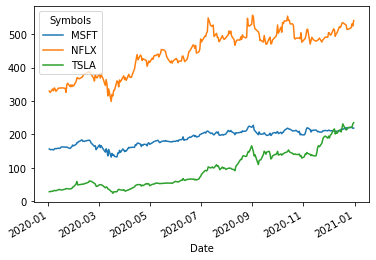

In [7]:


names = ["MSFT", "NFLX", "TSLA"]
data = getClose(names, "2020-01-01", "2021-01-01")
data

print(data.describe())

%matplotlib inline
data.plot()

¿Cómo lucen estos datos?

<AxesSubplot:ylabel='Frequency'>

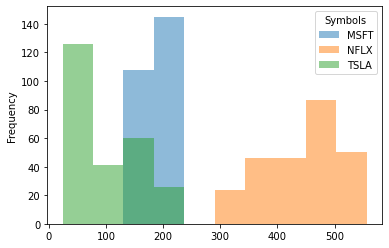

In [8]:
data.plot.hist(alpha=0.5)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [9]:
data.shift().head()

Symbols,MSFT,NFLX,TSLA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,156.591995,329.809998,28.684000
2020-01-06,154.642151,325.899994,29.534000
2020-01-07,155.041870,335.829987,30.102667
2020-01-08,153.628250,330.750000,31.270666


In [10]:
R = (data - data.shift())/data.shift()
print(R)
R.describe()

Symbols         MSFT      NFLX      TSLA
Date                                    
2020-01-02       NaN       NaN       NaN
2020-01-03 -0.012452 -0.011855  0.029633
2020-01-06  0.002585  0.030469  0.019255
2020-01-07 -0.009118 -0.015127  0.038801
2020-01-08  0.015928  0.025729  0.049205
...              ...       ...       ...
2020-12-24  0.007827 -0.000991  0.024443
2020-12-28  0.009922  0.010020  0.002901
2020-12-29 -0.003601  0.022634  0.003466
2020-12-30 -0.011019 -0.011830  0.043229
2020-12-31  0.003338  0.030767  0.015674

[253 rows x 3 columns]


Symbols,MSFT,NFLX,TSLA
count,252.000000,252.000000,252.000000
mean,0.001717,0.002387,0.009973
std,0.027679,0.029146,0.056355
min,-0.147390,-0.111389,-0.210628
25%,-0.010825,-0.013407,-0.019750
50%,0.002792,0.001268,0.007478
75%,0.013011,0.017654,0.039037
max,0.142169,0.116087,0.198949


<AxesSubplot:xlabel='Date'>

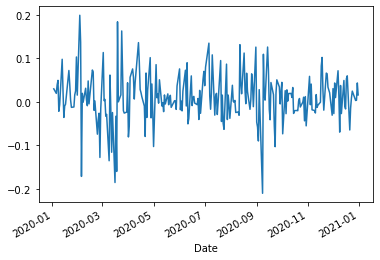

In [11]:
R["TSLA"].plot()

y la gráfica de los rendimientos se puede obtener como...

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'NFLX'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

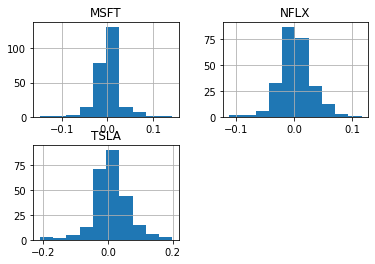

In [12]:
R.hist()

In [13]:
import numpy as np
r = np.log(data/data.shift())
r.head()

Symbols,MSFT,NFLX,TSLA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.012530,-0.011926,0.029203
2020-01-06,0.002581,0.030014,0.019072
2020-01-07,-0.009159,-0.015242,0.038067
2020-01-08,0.015803,0.025404,0.048033


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.


Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [18]:
import numpy as np 
r = np.log(data/data.shift()).dropna()
r.head

<bound method NDFrame.head of Symbols         MSFT      NFLX      TSLA
Date                                    
2020-01-03 -0.012530 -0.011926  0.029203
2020-01-06  0.002581  0.030014  0.019072
2020-01-07 -0.009159 -0.015242  0.038067
2020-01-08  0.015803  0.025404  0.048033
2020-01-09  0.012416 -0.010668 -0.022189
...              ...       ...       ...
2020-12-24  0.007797 -0.000992  0.024150
2020-12-28  0.009873  0.009970  0.002897
2020-12-29 -0.003607  0.022382  0.003460
2020-12-30 -0.011080 -0.011900  0.042321
2020-12-31  0.003333  0.030303  0.015552

[252 rows x 3 columns]>

In [19]:
R.dropna().head()

Symbols,MSFT,NFLX,TSLA
Date,,,
2020-01-03,-0.012452,-0.011855,0.029633
2020-01-06,0.002585,0.030469,0.019255
2020-01-07,-0.009118,-0.015127,0.038801
2020-01-08,0.015928,0.025729,0.049205
2020-01-09,0.012493,-0.010611,-0.021945


array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'NFLX'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

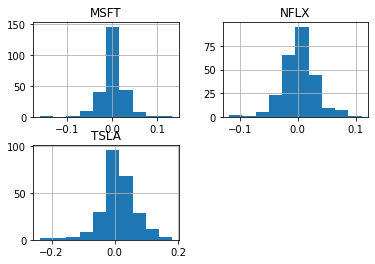

In [20]:
r.hist()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.